<a href="https://colab.research.google.com/github/helenamartinez/UFMS/blob/main/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Configuração e Exploração Inicial

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")

# Carregamento dos dados
df = pd.read_csv('abalone.csv')

# Exploração Inicial
print("--- Primeiras 5 linhas ---")
display(df.head())

print("\n--- Informações do Dataset (Tipos e Nulos) ---")
print(df.info())

print("\n--- Estatística Descritiva ---")
display(df.describe())

--- Primeiras 5 linhas ---


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7



--- Informações do Dataset (Tipos e Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

--- Estatística Descritiva ---


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


2. Análise Visual (EDA)

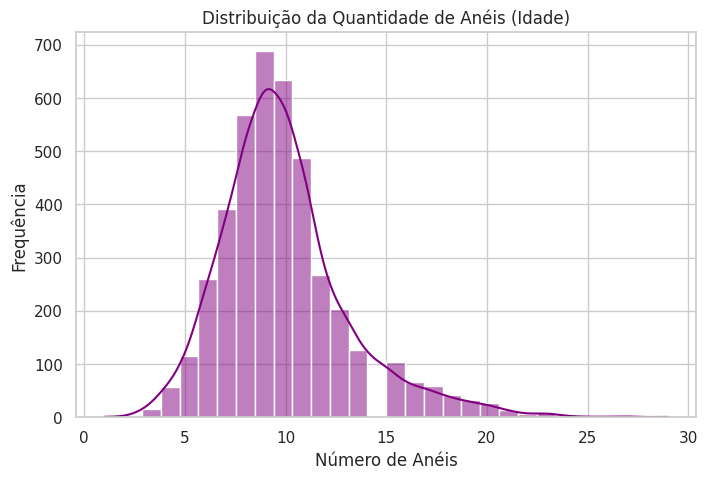

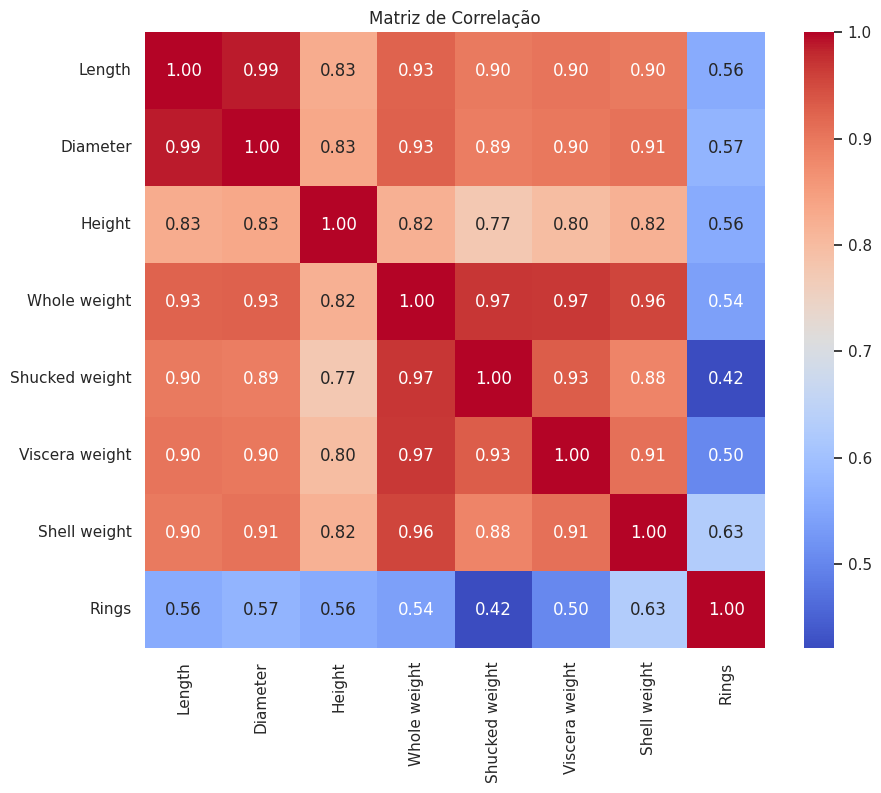

In [ ]:
# Distribuição da variável alvo (Rings)
plt.figure(figsize=(8, 5))
sns.histplot(df['Rings'], kde=True, bins=30, color='purple')
plt.title('Distribuição da Quantidade de Anéis (Idade)')
plt.xlabel('Número de Anéis')
plt.ylabel('Frequência')
plt.show()

# Mapa de Calor de Correlação (apenas colunas numéricas)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number]) # Seleciona apenas números
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

3. Pré-processamento (Tratando a variável 'Sex')

In [ ]:
# Transformando a variável categórica 'Sex' em variáveis numéricas
# drop_first=True remove uma das colunas para evitar multicolinearidade perfeita
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)
#Ao usar drop_first=True, se as colunas Sex_I e Sex_M forem 0, o modelo entende implicitamente que é Sex_F. Isso evita redundância matemática.
print("--- Dataset após One-Hot Encoding ---")
display(df_encoded.head())

--- Dataset após One-Hot Encoding ---


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


4. Desenvolvimento e Treinamento do Modelo

In [ ]:
#Agora vamos dividir os dados e treinar o modelo.

# Definindo Variáveis Independentes (X) e Dependente (y)
X = df_encoded.drop('Rings', axis=1) # Tudo menos 'Rings'
y = df_encoded['Rings']              # Apenas 'Rings'

# Divisão Treino e Teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciando e Treinando o Modelo
model = LinearRegression()
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")
print(f"Intercepto: {model.intercept_}")
print(f"Coeficientes: {model.coef_}")

Modelo treinado com sucesso!
Intercepto: 3.7434702028680293
Coeficientes: [ -0.20155385  11.12339118  10.44532535   8.93217555 -20.25654479
  -9.5589163    8.79237823  -0.71897444   0.10327613]


5. Avaliação do Modelo

--- Resultados da Avaliação ---
R² (Coeficiente de Determinação): 0.5482
RMSE (Raiz do Erro Quadrático Médio): 2.2116


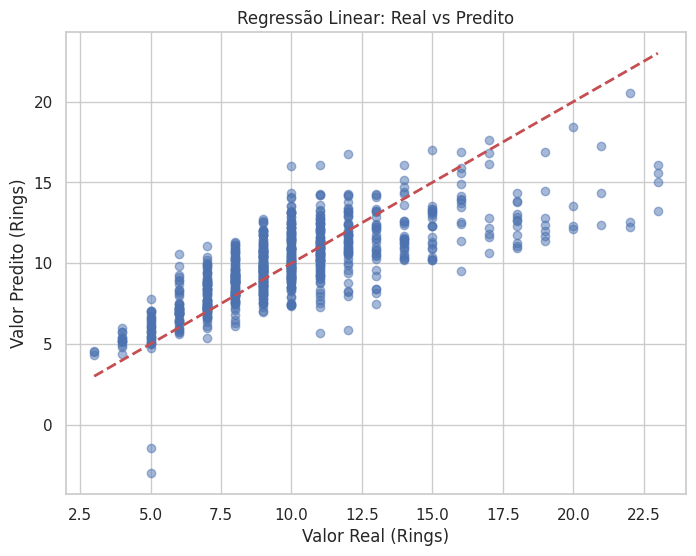

In [ ]:
# Fazendo predições no conjunto de teste
y_pred = model.predict(X_test)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Resultados da Avaliação ---")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")

# Gráfico Real vs Predito
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real (Rings)')
plt.ylabel('Valor Predito (Rings)')
plt.title('Regressão Linear: Real vs Predito')
plt.show()

6. Discussão dos Resultados

**R²**: O valor do R² para o dataset Abalone usando Regressão Linear costuma ficar entre 0.50 e 0.55. Isso significa que o modelo consegue explicar apenas cerca de 50-55% da variabilidade dos dados. Isso é considerado moderado. O modelo capturou a tendência geral, mas perde muitas nuances.

**RMSE**: Se o RMSE der em torno de 2.2, isso significa que, em média, o modelo erra a idade do Abalone por cerca de 2.2 anéis para mais ou para menos. Dado que a média de anéis é por volta de 9 ou 10, um erro de 2 anéis é significativo (aprox. 20% de erro).

Limitações do Modelo:

O crescimento biológico não é puramente linear. Abalones jovens crescem rápido, mas o crescimento desacelera e estabiliza na idade adulta. A Regressão Linear simples não captura bem curvas de saturação.

Observando o gráfico "Real vs Predito", vemos que para abalones mais velhos (muitos anéis), o erro do modelo aumenta (os pontos ficam mais dispersos longe da linha vermelha).

A Regressão Linear serve como uma baseline, mas para melhorar a precisão seria necessário utilizar modelos que suportam complexidade não-linear (como Árvores de Decisão, Random Forest) ou aplicar transformações polinomiais nas variáveis.